# HAIM experiment for Cardiomegaly Pathology Prediction
## Comparison of original method from MEDomics Udes HAIM repository and use of PyCaret

For additional information on PyCaret classification module : 
- Github complete tutorial : https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb
- PyCaret documentation : https://pycaret.readthedocs.io/en/stable/api/classification.html

For additional information on the HAIM study :
- Paper : https://www.nature.com/articles/s41746-022-00689-4
- Results: https://www.nature.com/articles/s41746-022-00689-4/figures/2

Original results for Fracture prediction :
- Original HAIM study : AUC = 0.914
- MEDomics-UdeS HAIM repository : AUC = 0.908 +/- 0.0038

### Imports

In [1]:
import numpy as np
from pandas import read_csv
from pycaret.classification import ClassificationExperiment
from sklearn.model_selection import StratifiedGroupKFold

### Define constants

In [2]:
FILE_DF = '../data/cxr_ic_fusion_1103.csv'
N_DATA = 45050
PREDICTIVE_COLUMNS_PREFIX = ['de_', 'vd_', 'vp_', 'vmd_', 'vmp_', 'ts_ce_', 'ts_le_', 'ts_pe_', 'n_ecg_', 'n_ech_']
EXPERIMENT = 'Cardiomegaly'

### Read data from local source

In [3]:
df = read_csv(FILE_DF, nrows=N_DATA)

### Modify the dataset for the HAIM experiment

In [4]:
# Get data where there is a value for Fracture
df = df[df[EXPERIMENT].isin([0, 1])]

# Keep columns for the prediction
columns = ['haim_id', EXPERIMENT]
for column_suffix in PREDICTIVE_COLUMNS_PREFIX:
    for df_column in df.columns:
        if df_column.startswith(column_suffix):
            columns.append(df_column)
df = df[columns]

### Setup

Here we make sure that a haim_id (which isn't unique) appears in only one dataset, and we also proceed to stratified splits.

In [5]:
exp = ClassificationExperiment()
exp.setup(df, target=EXPERIMENT, train_size=0.8, fold_strategy=StratifiedGroupKFold(), fold_groups='haim_id', fold=5)

,Description,Value
0,Session id,4299
1,Target,Cardiomegaly
2,Target type,Binary
3,Original data shape,"(18571, 4079)"
4,Transformed data shape,"(18571, 4079)"
5,Transformed train set shape,"(14856, 4079)"
6,Transformed test set shape,"(3715, 4079)"
7,Numeric features,4078
8,Preprocess,True
9,Imputation type,simple


### Compare models

Compare all available models sorting by AUC score.

In [6]:
pycaret_model = exp.compare_models(include= ['lr', 'knn', 'nb', 'dt', 'svm',
                                             'mlp', 'ridge', 'rf', 'qda', 'ada', 'gbc', 'lda', 
                                             'et', 'lightgbm', 'xgboost'], sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9041,0.9068,0.9909,0.9050,0.9460,0.5269,0.5740,3.0340
rf,Random Forest Classifier,0.9055,0.9029,0.9889,0.9078,0.9466,0.5414,0.5821,7.1400
lightgbm,Light Gradient Boosting Machine,0.9069,0.8975,0.9805,0.9157,0.9469,0.5710,0.5943,20.0900
xgboost,Extreme Gradient Boosting,0.9057,0.8964,0.9795,0.9152,0.9462,0.5658,0.5886,81.6900
gbc,Gradient Boosting Classifier,0.8785,0.8690,0.9739,0.8925,0.9314,0.4068,0.4394,168.5040
ada,Ada Boost Classifier,0.8593,0.8331,0.9494,0.8915,0.9196,0.3618,0.3739,35.0460
lda,Linear Discriminant Analysis,0.8342,0.7939,0.8838,0.9176,0.9003,0.4088,0.4117,40.3340
dt,Decision Tree Classifier,0.8422,0.7148,0.8982,0.9141,0.9061,0.4135,0.4142,25.9040
mlp,MLP Classifier,0.7760,0.5550,0.8844,0.8562,0.8674,0.0628,0.0678,17.8420
knn,K Neighbors Classifier,0.8067,0.5487,0.9309,0.8541,0.8908,0.0606,0.0653,3.4300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### Create model
#### HAIM model
Make experiment on the same model as the study, XGBoost.

In [7]:
haim_model = exp.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9052,0.8947,0.9790,0.9151,0.9459,0.5663,0.5882
1,0.9098,0.8969,0.9817,0.9176,0.9486,0.5848,0.6078
2,0.9013,0.8828,0.9817,0.9092,0.9441,0.5324,0.5621
3,0.9055,0.9026,0.9766,0.9172,0.9459,0.5727,0.5911
4,0.9067,0.9052,0.9785,0.9169,0.9467,0.5731,0.5935
Mean,0.9057,0.8964,0.9795,0.9152,0.9462,0.5658,0.5886
Std,0.0027,0.0078,0.0020,0.0031,0.0015,0.0178,0.0149


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#### PyCaret best model
Make experiment on the best model found by PyCaret best_model() function.

In [8]:
pycaret_model = exp.create_model(pycaret_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9062,0.9072,0.9937,0.9050,0.9472,0.5357,0.5877
1,0.9104,0.9084,0.9928,0.9097,0.9495,0.5625,0.6076
2,0.8980,0.8963,0.9901,0.8997,0.9427,0.4868,0.5388
3,0.9028,0.9133,0.9893,0.9048,0.9452,0.5244,0.5686
4,0.9030,0.9089,0.9885,0.9057,0.9453,0.5251,0.5675
Mean,0.9041,0.9068,0.9909,0.9050,0.9460,0.5269,0.5740
Std,0.0041,0.0056,0.0020,0.0032,0.0023,0.0243,0.0229


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tune Model
#### HAIM model
Tune model with the same grid search as the HAIM study, and optimize AUC as used in the study.
HAIM AUC is 0.83 (but it is not sure that they respect the fact a patient can't be in two different sets).

tuning_grid = {'max_depth': [5, 6, 7, 8],
               'n_estimators': [200, 300],
               'learning_rate': [0.3, 0.1, 0.05]
               }
haim_model = exp.tune_model(haim_model, custom_grid = tuning_grid, optimize = 'AUC')

haim_model

#### PyCaret best model
Tune PyCaret best model.

pycaret_model = exp.tune_model(pycaret_model, optimize = 'AUC')

pycaret_model

### Analyze model
#### HAIM model
Plot the AUC curve and feature importance.

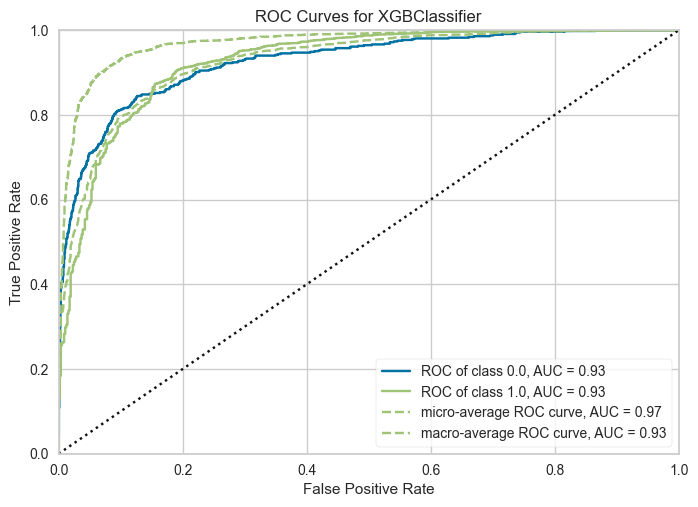

In [9]:
exp.plot_model(haim_model, plot='auc')

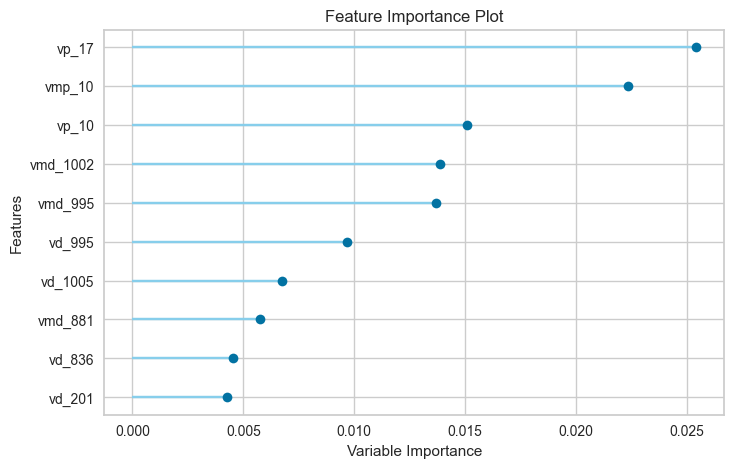

In [10]:
exp.plot_model(haim_model, plot='feature')

#### PyCaret best model

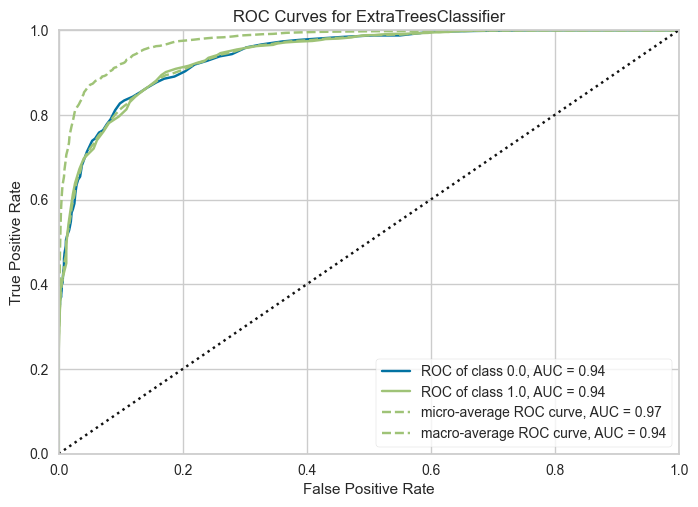

In [11]:
exp.plot_model(pycaret_model, plot='auc')

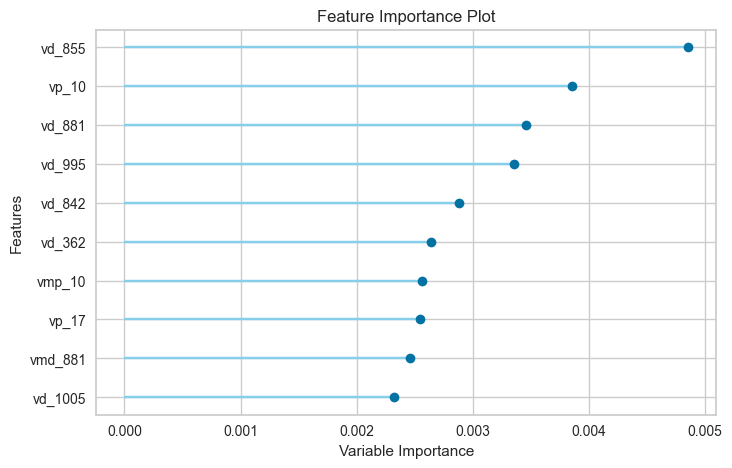

In [12]:
exp.plot_model(pycaret_model, plot='feature')

### Interpret model
#### HAIM model

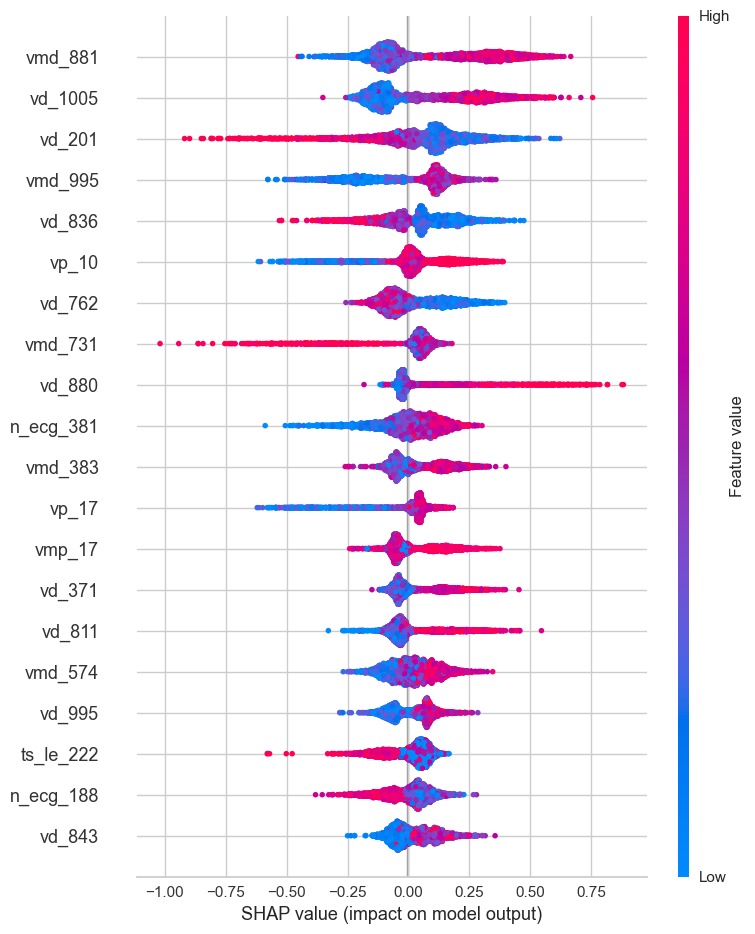

In [13]:
exp.interpret_model(haim_model, plot='summary')

PyCaret best model

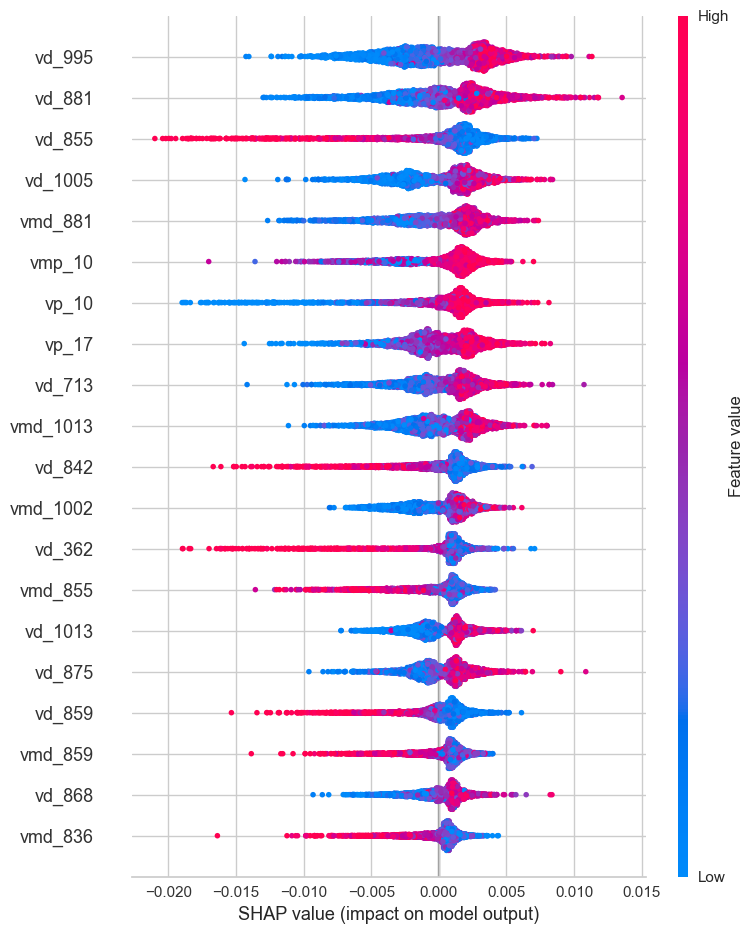

In [14]:
exp.interpret_model(pycaret_model, plot='summary')

### Save / Load models
#### HAIM model

In [15]:
exp.save_model(haim_model, 'best_models/cardiomegaly_haim_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['haim_id', 'de_0', 'de_1', 'de_2',
                                              'de_3', 'de_4', 'de_5', 'vd_0',
                                              'vd_1', 'vd_2', 'vd_3', 'vd_4',
                                              'vd_5', 'vd_6', 'vd_7', 'vd_8',
                                              'vd_9', 'vd_10', 'vd_11', 'vd_12',
                                              'vd_13', 'vd_14', 'vd_15', 'vd_16',
                                              'vd_17', 'vd_18', 'vd_19', 'vd_20',
                                              'vd_21', 'vd_22', ...],
                                     t...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                m

In [16]:
load_haim_model = exp.load_model('best_models/cardiomegaly_haim_model')

Transformation Pipeline and Model Successfully Loaded


#### PyCaret best model

In [17]:
exp.save_model(pycaret_model, 'best_models/cardiomegaly_pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['haim_id', 'de_0', 'de_1', 'de_2',
                                              'de_3', 'de_4', 'de_5', 'vd_0',
                                              'vd_1', 'vd_2', 'vd_3', 'vd_4',
                                              'vd_5', 'vd_6', 'vd_7', 'vd_8',
                                              'vd_9', 'vd_10', 'vd_11', 'vd_12',
                                              'vd_13', 'vd_14', 'vd_15', 'vd_16',
                                              'vd_17', 'vd_18', 'vd_19', 'vd_20',
                                              'vd_21', 'vd_22', ...],
                                     t...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       m

In [18]:
load_pycaret_model = exp.load_model('best_models/cardiomegaly_pycaret_model')

Transformation Pipeline and Model Successfully Loaded
